## Logitic regression

In [38]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [2]:
df = pd.read_csv(r"\Users\tsmr_\Desktop\Session folder\Machine Learning\data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# convert categorical variables to numeric representation 
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['region'] = LabelEncoder().fit_transform(df['region'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

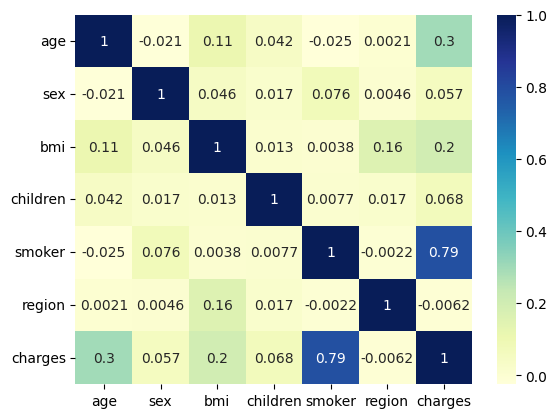

In [7]:
# Get the heatmap to see which variables are has strong correlation 
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')

As you can see above navy blue 0.79 has strong correlation. That is charges and smoker has strong correlation 

In [8]:
# Create input matrix and target vector
X = df['charges']   # X is uppercase since it is matrices
y = df['smoker']    # y it is lowercase since it is a vector 

# Look at the shape of the object
X.shape, y.shape

((1338,), (1338,))

In [14]:
# Structure of input matrices
# (n_observations, n_features)

# Reshape

X = np.reshape(X, (-1,1))
X.shape

(1338, 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Create logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [30]:
# let see the coefficeitn and intercept
print("Coefficeint : ", log_reg.coef_)
print("intercept : ", log_reg.intercept_)


Coefficeit :  [[0.00024863]]
intercept :  [-5.59733996]


In [29]:
X_test

array([[ 9095.06825 ],
       [ 5272.1758  ],
       [29330.98315 ],
       [ 9301.89355 ],
       [33750.2918  ],
       [ 4536.259   ],
       [ 2117.33885 ],
       [14210.53595 ],
       [ 3732.6251  ],
       [10264.4421  ],
       [18259.216   ],
       [ 7256.7231  ],
       [ 3947.4131  ],
       [46151.1245  ],
       [48673.5588  ],
       [44202.6536  ],
       [ 9800.8882  ],
       [42969.8527  ],
       [ 8233.0975  ],
       [21774.32215 ],
       [ 5080.096   ],
       [ 7441.501   ],
       [ 1256.299   ],
       [ 2755.02095 ],
       [11085.5868  ],
       [10923.9332  ],
       [12644.589   ],
       [18804.7524  ],
       [ 9715.841   ],
       [ 1131.5066  ],
       [15828.82173 ],
       [11842.62375 ],
       [ 2020.5523  ],
       [ 5693.4305  ],
       [ 2904.088   ],
       [ 7448.40395 ],
       [ 2597.779   ],
       [ 7337.748   ],
       [23887.6627  ],
       [38709.176   ],
       [ 4687.797   ],
       [ 2643.2685  ],
       [11674.13    ],
       [121

In [25]:
y_pred = log_reg.predict(X_test)

In [26]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0])

In [27]:
y_test

764     0
887     0
890     1
1293    0
259     1
       ..
109     1
575     0
535     0
543     1
846     0
Name: smoker, Length: 268, dtype: int32

In [37]:
# Check the performance by printing confusion matrix and accuracy 
print("confusion matrix: \n", confusion_matrix(y_pred, y_test))
print("Accuracy score :", accuracy_score(y_pred, y_test))

confusion matrix: 
 [[206  14]
 [  8  40]]
accuracy : 0.917910447761194


As shown above, 246 predictions(from confusion metrics) are correct and accuracy score 91% is good which confirms our model works fine.

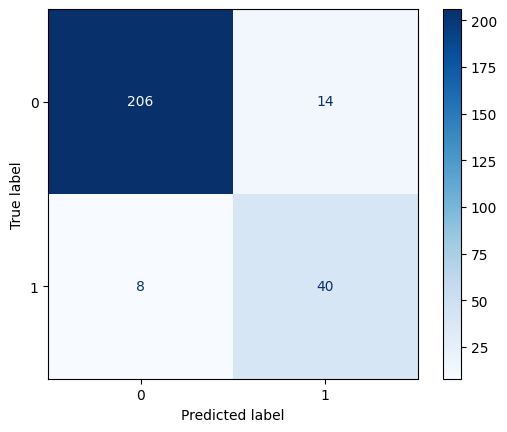

In [43]:
# Heatmap for confusion matrix using scikit-learn
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_pred, y_test, labels=log_reg.classes_)

# sns.heatmap to get the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=log_reg.classes_)
disp.plot(cmap = 'Blues')

In [41]:
# Additionaly we can evaluate the model by checking classification report metrics that covers precision, recall, F1 score 
print("Classification report : \n", classification_report(y_pred, y_test))

Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       220
           1       0.74      0.83      0.78        48

    accuracy                           0.92       268
   macro avg       0.85      0.88      0.87       268
weighted avg       0.92      0.92      0.92       268

